## Import Libraries , Load and read population dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_excel('population_total.xlsx')
data.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


### To reshape data set in Long format use melt function make three columns country, year,population

In [ ]:
data=pd.melt(data,id_vars=['country'],var_name='year',value_name='population')
data

,country,year,population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k
...,...,...,...
59292,Samoa,2100,310k
59293,Yemen,2100,53.2M
59294,South Africa,2100,79.2M
59295,Zambia,2100,81.5M


### To replace all M,k values in population column convert it

In [ ]:
def convert(col):
        col = str(col).strip()
        if 'M' in col:
            return float(col.replace('M', '').strip()) * 1000000
        elif 'k' in col:
            return float(col.replace('k', '').strip()) * 1000
        elif 'B' in col:
            return float(col.replace('B', '').strip()) * 1000000000
        else:
            return float(col)

In [ ]:
data['population'] = data['population'].apply(convert)
data['population']

0         3280000.0
1         1570000.0
2          400000.0
3            2650.0
4           40200.0
            ...    
59292      310000.0
59293    53200000.0
59294    79200000.0
59295    81500000.0
59296    31000000.0
Name: population, Length: 59297, dtype: float64

In [ ]:
data.head()

,country,year,population
0,Afghanistan,1800,3280000.0
1,Angola,1800,1570000.0
2,Albania,1800,400000.0
3,Andorra,1800,2650.0
4,United Arab Emirates,1800,40200.0


### getting sum of population for each year

In [ ]:
data_grouped=data.groupby('year')['population'].sum()
data_grouped

year
1800    9.844545e+08
1801    9.878949e+08
1802    9.915552e+08
1803    9.949540e+08
1804    9.974856e+08
            ...     
2096    1.085507e+10
2097    1.085810e+10
2098    1.086331e+10
2099    1.085769e+10
2100    1.086488e+10
Name: population, Length: 301, dtype: float64

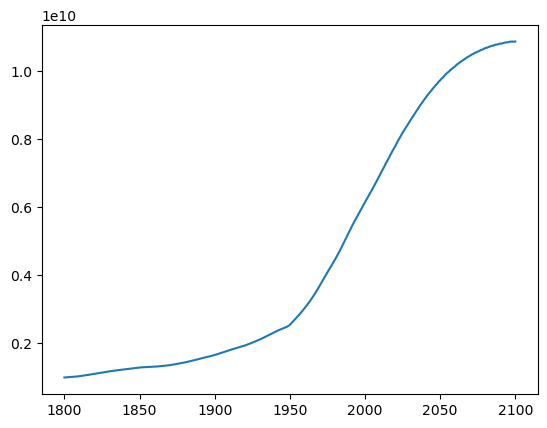

In [ ]:
plt.plot(data_grouped)

##### Insight:
   from trends line : number of population increase each year
    

### getting max population for each country

####  Round population column just to can plotting it in bar plot with these rounded values .

In [ ]:
data_grop_country=data.groupby('country')['population'].max()
top_10_country_grouped=data_grop_country[:10]/1000
top_10_country_grouped

country
Afghanistan             77000.0
Albania                  3290.0
Algeria                 70700.0
Andorra                    84.5
Angola                 188000.0
Antigua and Barbuda       111.0
Argentina               57900.0
Armenia                  3540.0
Australia               42900.0
Austria                  9220.0
Name: population, dtype: float64

Text(0, 0.5, 'max_population')

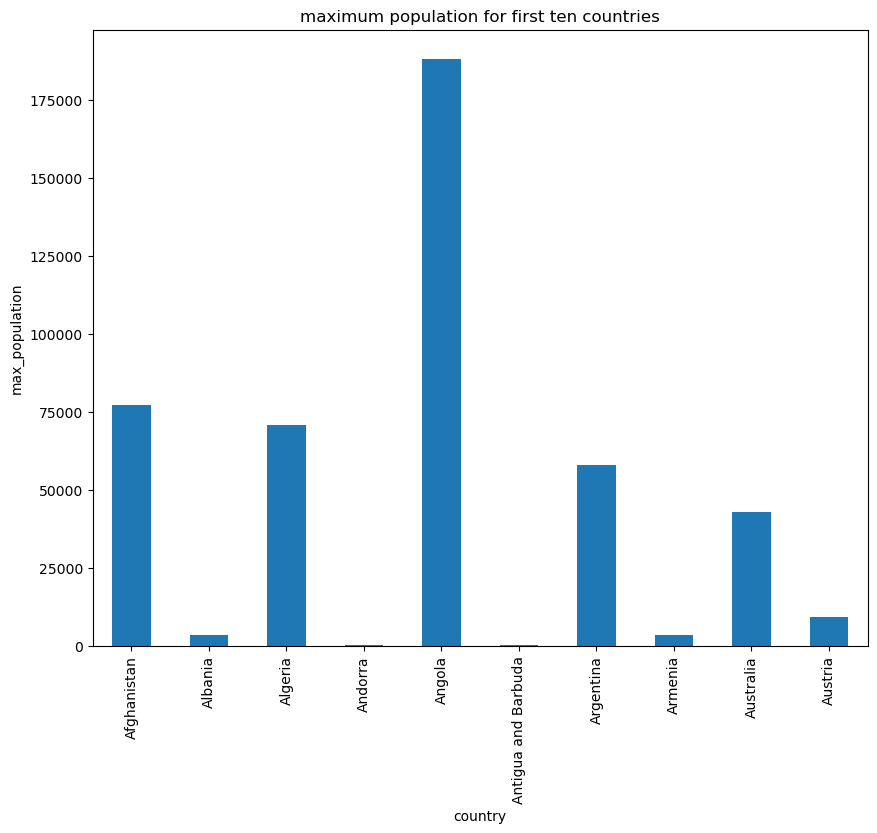

In [ ]:
top_10_country_grouped.plot(kind='bar', figsize=(10, 8))
plt.title('maximum population for first ten countries')
plt.xlabel('country')
plt.ylabel('max_population')

In [ ]:
top_country_pop = data.groupby('country')['population'].max().sort_values(ascending=False)/1000
top_country_pop

country
India            1650000.000
China            1460000.000
Nigeria           733000.000
United States     434000.000
Pakistan          405000.000
                    ...     
San Marino            34.400
Tuvalu                20.000
Palau                 19.900
Nauru                 11.000
Holy See               0.912
Name: population, Length: 197, dtype: float64

Text(0, 0.5, 'max_country_population')

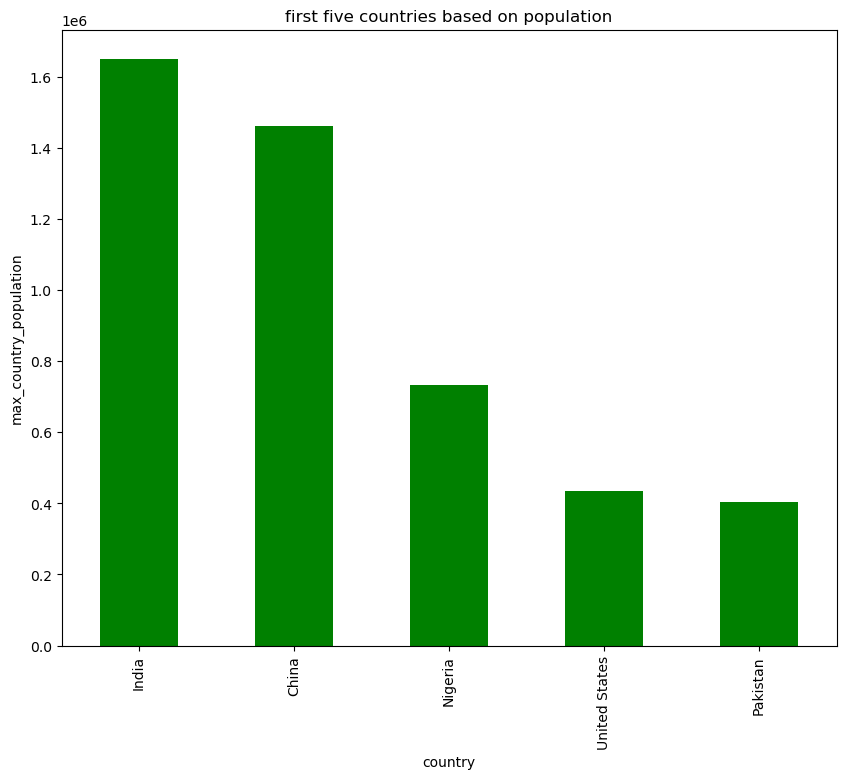

In [ ]:
top_country_pop[:5].plot(kind='bar', figsize=(10, 8),color='g')
plt.title('first five countries based on population')
plt.xlabel('country')
plt.ylabel('max_country_population')

## Insight:
#### from these observation : India is most populated country in the world.

In [ ]:
data['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

### show trends in the two highest countries based on population over year

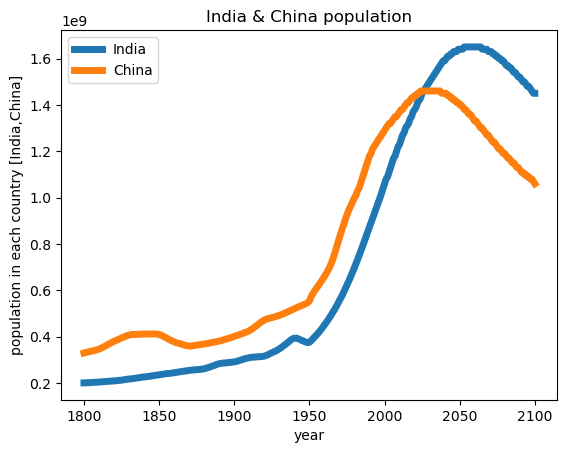

In [ ]:
ind=data[data['country']=='India']
china=data[data['country']=='China']
plt.plot(ind['year'],ind['population'],linewidth=5,label='India')
plt.plot(china['year'],china['population'],linewidth=5,label='China')
plt.xlabel('year')
plt.ylabel("population in each country [India,China]")
plt.title("India & China population")
plt.legend()

### Insight:
from observation: in two countries the population increase each year but in India it decrease from 2050 and stabled and in china it decrease from 2000 and stabled